# ML vs. CNNs

Imaginen que uds trabajan en el correo, y quieren automatizar el despacho de los paquetes y cartas.

Ya disponen de un software que logra capturar las direcciones y separarlas caracter por caracter en imágenes de 8 píxeles x 8 píxeles en escala de grises, tales que 0 es el negro absoluto, y entre mayor el valor más claro el pixel.

Ese software además puede inferir, según el lugar de los caracteres en la dirección, si cada caracter es una letra o un dígito, pero su labor se termina ahí. 

<img src="Imagen_0_64x64.png">

Se va a utilizar el dataset de imágenes de dígitos MNIST que viene en la librería de Keras, que presenta 60000+10000 imágenes en escala de grises de tamaño 28x28 pixeles. El dataset de la librería scikit-learn que utilizamos anteriormente tenía imágenes de 8x8 pixeles.

La idea de esta aproximación es comparar dos modelos de clasificación: un modelo de Naïve Bayes de machine learning tradicional, y un modelo de redes convolucionales típico de Deep Learning.

## Obtención y preparación del dataset

Los datos vienen separados en dos subconjuntos: uno para entrenar los modelos clasificadores y otro para evaluarlos. Cada dataset viene en una matriz de 3 dimensiones.
La primera dimensión de train_images es de 60000, pues hay 60000 imagenes, las 2 siguientes dimensiones son las que dan el tamaño de las imágenes (28x28). Cada valor de la matriz de 28x28 es una valor de gris de 0 a 255 (enteros).

In [51]:
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import pylab as pl

In [34]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
test_images.shape

(10000, 28, 28)

## Modelo Naïve Bayes de ML tradicional

Se tienen en total: 60000 imágenes de entrenamiento y  10000 de test
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0 

<Figure size 432x288 with 0 Axes>

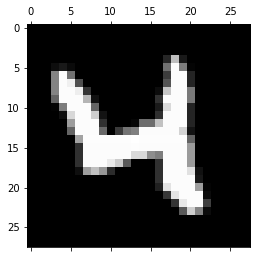

In [37]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(train_images[20]) # Imprimir una imagen dada
print("Se tienen en total:", len(train_images), "imágenes de entrenamiento y ", len(test_images), "de test")
print(train_images[20]) # Ver su representación en pixeles

In [38]:
y = train_labels
print(y[20])

4


Para poder simplificar la representación de los datos, se pueden aplanar las matrices de pixeles para poner cada imagen en un solo array de 64 pixeles:

In [39]:
X = train_images.reshape((len(train_images), -1)) # se reducen las dimensiones
print(X[20])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  38 190  25   0   0   0   0   0   0   0   0   0   0   0  13
  25  10   0   0   0   0   0   0   0   0   0   0   0 112 252 125   4   0
   0   0   0   0   0   0   0   0   0 132 252 113   0   0   0   0   0   0
   0   0   0   0   0  61 252 252  36   0   0   0   0   0   0   0   0   0
   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84 252 252
  36   0   0   0   0   0   0   0   0   0   0 132 252 252 238  52   0   0
   0   0   0   0   0   0  12 198 252 252 122   0   

In [23]:
gnb = GaussianNB()
fit = gnb.fit(X, y)

Se pueden evaluar las clases estimadas por el modelo vs. las clases reales

In [24]:
y_estimado = fit.predict(X)
print("Reales   :", y[0:25])
print("Estimados:", y_estimado[0:25])

Reales   : [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]
Estimados: [3 0 4 1 9 8 1 8 1 8 8 8 3 6 1 9 6 1 6 9 3 0 9 1 6]


Podemos tener una idea más clara de los casos en los que se equivoca el modelo:

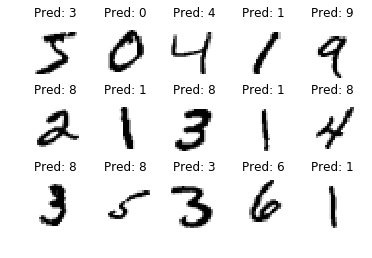

In [40]:
images_and_predictions = list(zip(train_images, y_estimado))
for index, (image, prediction) in enumerate(images_and_predictions[:15]):
    pl.subplot(3,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    pl.axis('off')  #se quitan los ejes
    pl.imshow(image, cmap=pl.cm.gray_r)
    pl.title('Pred: %i' % prediction)
plt.show()

Nos gustaría tener una idea de la correctitud global del modelo aprendido.

In [41]:
metrics.accuracy_score(y, y_estimado)

0.5649

In [86]:
metrics.cohen_kappa_score(y, y_estimado)

0.5162161559545535

Recordemos que con el dataset de imágenes de 8x8 pixeles este tipo de clasificadores alcanzaba una correctitud del 85.8%. En este caso con las imágenes de 28x28 solo se logra el 56.5%. 
Podemos entonces ver las limitaciones de los modelos tradicionales para el tratamiento de datos no estructurados como las imágenes. Además hay que tener en cuenta que estas imágenes están bastante depuradas en el sentido de que no cuentan con más información que la de los dígitos en cuestión, solo tienen un canal de color (escala de grises), los dígitos están centrados y abarcan la totalidad del espacio.

Si tuvieramos imágenes un poco más complejas los modelos tradicionales perderían por completo su poder predictivo.

In [82]:
print(metrics.classification_report(y, y_estimado))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82      5923
          1       0.81      0.94      0.87      6742
          2       0.88      0.30      0.45      5958
          3       0.74      0.37      0.49      6131
          4       0.84      0.18      0.29      5842
          5       0.66      0.06      0.11      5421
          6       0.67      0.94      0.78      5918
          7       0.91      0.31      0.46      6265
          8       0.29      0.65      0.40      5851
          9       0.38      0.95      0.54      5949

avg / total       0.70      0.56      0.53     60000



array([[5206,    9,   33,   16,    9,   13,  165,    5,  356,  111],
       [   4, 6341,   15,   33,    3,   12,   74,    4,  173,   83],
       [ 484,  152, 1786,  474,   33,   37, 1443,   17, 1444,   88],
       [ 274,  295,   49, 2277,   11,   15,  268,   46, 2274,  622],
       [ 114,   39,   49,   33, 1027,   35,  483,   21, 1259, 2782],
       [ 525,  122,   33,  125,   34,  336,  273,   11, 3411,  551],
       [  47,   92,   25,    3,    4,   19, 5572,    0,  148,    8],
       [  27,   36,    9,   54,   51,    8,   15, 1919,  190, 3956],
       [  88,  722,   23,   51,   19,   33,   80,    6, 3802, 1027],
       [  30,   31,   17,    7,   33,    4,    4,   83,  112, 5628]],
      dtype=int64)

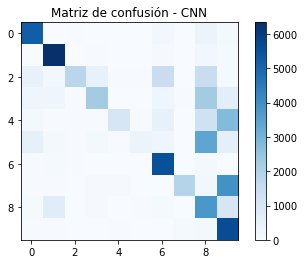

In [85]:
cm= metrics.confusion_matrix(y, y_estimado)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión - CNN")
plt.colorbar()
tick_marks = np.arange(3)
cm

## Modelo Convolucional

Vamos ahora a aplicar un modelo de redes neuronales convoluncionales (CNN - Convulutional Neural Network).
El propósito aquí es solo de ilustración; la explicación del funcionamiento se hará progresivamente a través del curso.

Necesitamos que los datos de entrenamiento y test estén en el formato dado por la capa de entrada de la red que vamos a definir. El modelo recibirá tensores, matrices multi-dimensionales con el alto de la imagen, el largo de la imagen, y el canal de color, que representarán instancias de imágenes que usan 1 solo canal de color (la escala de grises) que originalmente va de 0 a 255 (enteros).

Dado que partimos de un tensor de entrenamiento 60000x28x28, tenemos que agregar el cuarto eje al tensor (con una sola dimensión, con el único canal de color), vamos además a normalizar la escala de grises con valores float que vayan de 0 a 1.

Finalmente, convertimos los labels de arrays one hot encoded.

In [43]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Vamos a definir un modelo:
* que recibe un tensor con las instancias de imágen con tres ejes con la dimensionalidad (28, 28, 1), 
* con 3 capas convolucionales 2D, la primera con 32 filtros de 3x3 utilizando una función de activación RELU, y la segunda con 64 filtros,
* con capas intermedias de pooling que toman las salidas de las capas convolucionales, calculando el MAX de los valores de ventanas de 2x2.
* con una capa que aplana la salida de las capas convolucionales
* con 2 capas densas totalmente conectadas de 64 neuronas y 10 neuronas respectivamente, la primera con una función de activación ReLU y la última sirviendo de capa de salida utilizando una función de activación Softmax.

In [29]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

Podemos ver que el total de parámetros para esta "sencilla" red es ya de 93322!
Por ahora solo hemos definido la arquitectura de la red. Vamos ahora a compilarla y a entrenarla con el dataset de training. Utilizamos un **optimizador** rmsprop modifica los valores de los parámetros teniendo en cuenta una **funcion de costo** que se quiere minimizar (ya hablaremos de esto en detalle más adelante). 

In [30]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 48s 793us/step - loss: 0.1705 - acc: 0.9463
Epoch 2/5
60000/60000 [==============================] - 52s 868us/step - loss: 0.0477 - acc: 0.98460s - loss: 0.0478 - 
Epoch 3/5
60000/60000 [==============================] - 53s 876us/step - loss: 0.0334 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 50s 833us/step - loss: 0.0256 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 49s 822us/step - loss: 0.0201 - acc: 0.9936


Evaluamos el modelo CNN aprendido con el set de test:

In [48]:
predictions = model.predict(test_images)
print("Se obtienen las 10 probabilidades de cada clase para las 10000 imágenes de test")
predictions.shape

Se obtienen las 10 probabilidades de cada clase para las 10000 imágenes de test


(10000, 10)

In [49]:
predictions[0]

array([6.9642092e-10, 1.8763027e-09, 1.7930181e-06, 5.7932482e-07,
       8.6888523e-09, 1.4104765e-09, 2.3430834e-12, 9.9999714e-01,
       3.7093548e-09, 4.2131589e-07], dtype=float32)

Encontramos el dígito más probable que corresponde entonces con la clase predicha.

In [74]:
y_pred = np.argmax(predictions, axis=1)
y_test = np.argmax(test_labels, axis=1)

array([[ 975,    1,    3,    0,    0,    0,    1,    0,    0,    0],
       [   0, 1124,    1,    1,    1,    1,    2,    1,    4,    0],
       [   0,    0, 1031,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  973,    0,    2,    0,    0,    7],
       [   2,    0,    0,    4,    0,  884,    1,    0,    0,    1],
       [   2,    1,    0,    0,    1,    4,  949,    0,    1,    0],
       [   0,    2,   18,    0,    0,    0,    0, 1003,    1,    4],
       [   1,    0,    3,    0,    0,    1,    0,    0,  966,    3],
       [   0,    0,    0,    0,    2,    2,    0,    0,    0, 1005]],
      dtype=int64)

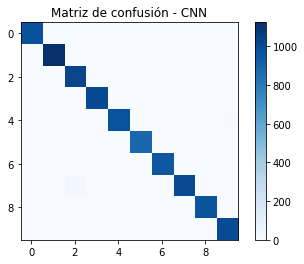

In [83]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión - CNN")
plt.colorbar()
tick_marks = np.arange(3)
cm

In [78]:
metrics.accuracy_score(y_test, y_pred)

0.9916

In [77]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.98      1.00      0.99      1032
          3       1.00      1.00      1.00      1010
          4       1.00      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       1.00      0.98      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      1.00      0.99      1009

avg / total       0.99      0.99      0.99     10000

